In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
crime_rates=pd.read_csv('crime_data.csv')

In [3]:
crime_rates.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime_rates.isna().any().sum()

0

In [5]:
crime_rates.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [6]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [7]:
crime_rates=crime_rates.rename(columns={'Unnamed: 0':'State'})

In [8]:
crime_rates.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
crime_rates1=crime_rates.iloc[0:,1:].values

In [10]:
scaled_crime_rates = scaler.fit_transform(crime_rates1)

The single linkage type will produce dendrograms which are not structured properly, whereas complete or average linkage will produce clusters which have a proper tree-like structure.

Text(0, 0.5, 'Euclidean distances')

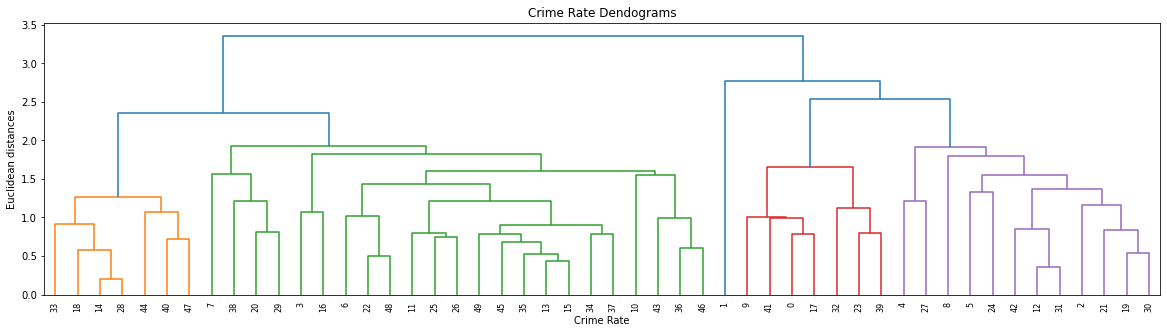

In [11]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_crime_rates, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

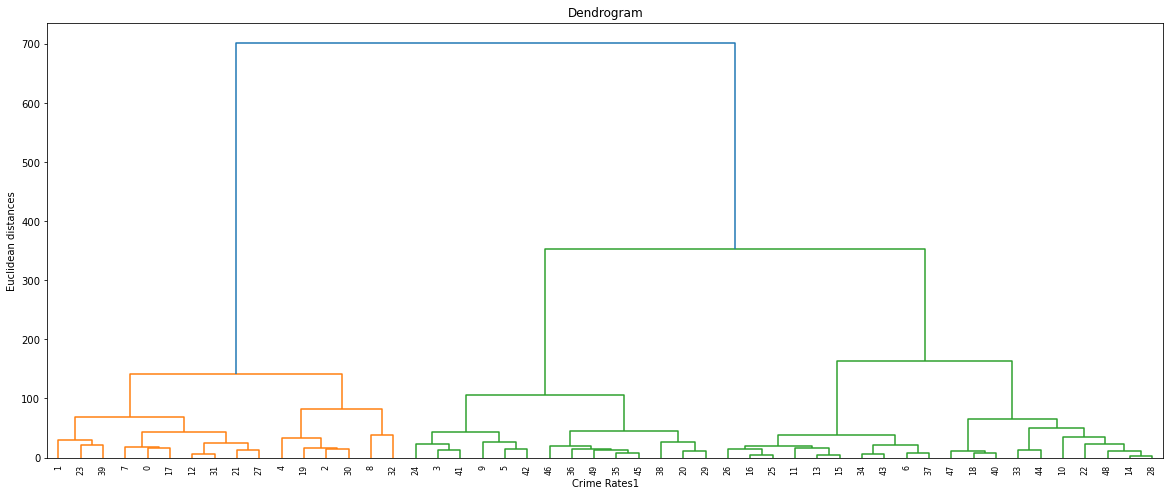

In [12]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(crime_rates1, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Crime Rates1')
plt.ylabel('Euclidean distances')
plt.show()

Ward method will had tried to minimize the variance within each cluster (Variance within each cluster)so now i can say that my number of clusters would be 3.

In [13]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [15]:
y_hc = hc.fit_predict(crime_rates1)

In [16]:
Clusterslabels=pd.DataFrame(y_hc,columns=['hc_Clusters'])

In [17]:
Clusterslabels.head()

,hc_Clusters
0,1
1,1
2,1
3,2
4,1


In [18]:
hc_crime_rates=pd.concat([crime_rates,Clusterslabels],axis=1)

In [19]:
hc_crime_rates['hc_Clusters'].value_counts()

0    20
1    16
2    14
Name: hc_Clusters, dtype: int64

<AxesSubplot:xlabel='hc_Clusters', ylabel='count'>

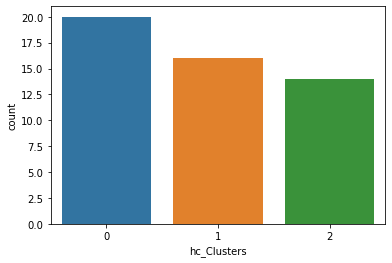

In [20]:
sns.countplot(x='hc_Clusters',data=hc_crime_rates)

# The murder rape assault and urbpop is more in cluster 0 then compared to 1 and 2 so cluster 0 we can say as danger zone and cluster 1 as moderate zone and cluster 2 as safe zone .

# DBSCAN

In [21]:
array=crime_rates.iloc[:,1:].values

In [23]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [24]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [25]:
dbscan = DBSCAN(eps=1.2, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=1.2, min_samples=4)

In [26]:
#Noisy samples are given the label -1.
dbscan.labels_


array([ 0, -1,  1,  1, -1, -1,  1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [27]:
cl=pd.DataFrame(dbscan.labels_,columns=['dbscan_cluster'])

In [28]:
cl.head()

,dbscan_cluster
0,0
1,-1
2,1
3,1
4,-1


In [29]:
dbscan_crime_rates=pd.concat([crime_rates,cl],axis=1)

In [30]:
dbscan_crime_rates.head()

,State,Murder,Assault,UrbanPop,Rape,dbscan_cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,-1


In [31]:
dbscan_crime_rates[dbscan_crime_rates['dbscan_cluster']==-1]

,State,Murder,Assault,UrbanPop,Rape,dbscan_cluster
1,Alaska,10.0,263,48,44.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
8,Florida,15.4,335,80,31.9,-1
27,Nevada,12.2,252,81,46.0,-1


In [32]:
(dbscan_crime_rates['dbscan_cluster']==-1).value_counts()

False    45
True      5
Name: dbscan_cluster, dtype: int64

In [33]:
dbscan_crime_rates[['dbscan_cluster','State']]
#Here you can see which state belongs to which clusters

,dbscan_cluster,State
0,0,Alabama
1,-1,Alaska
2,1,Arizona
3,1,Arkansas
4,-1,California
5,-1,Colorado
6,1,Connecticut
7,1,Delaware
8,-1,Florida
9,0,Georgia


In [34]:
dbscan_crime_rates['dbscan_cluster'].value_counts()

 1    38
 0     7
-1     5
Name: dbscan_cluster, dtype: int64

# K _MEANS CLUSTERING

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_rates= scaler.fit_transform(crime_rates.iloc[:,1:])

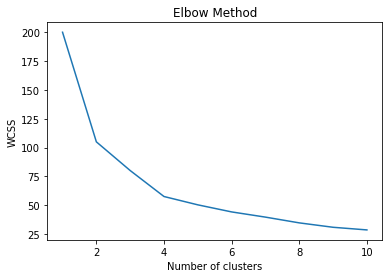

In [36]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_rates)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow curve says about the number of clusters which is k =4

In [38]:
from sklearn.cluster import KMeans
k_means= KMeans(4, random_state=42)
#fitting k-means to my dataset crime_rates
k_means.fit(scaled_crime_rates)

KMeans(n_clusters=4, random_state=42)

In [39]:
k_means.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [41]:
kmeans=pd.DataFrame(k_means.labels_,columns=['kmeans_cluster'])

In [42]:
kmeans

,kmeans_cluster
0,0
1,3
2,3
3,0
4,3
5,3
6,1
7,1
8,3
9,0


In [43]:
kmeans_crime_rates=pd.concat([crime_rates,kmeans],axis=1)

In [44]:
kmeans_crime_rates.head()

,State,Murder,Assault,UrbanPop,Rape,kmeans_cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,3


In [45]:
kmeans_mean_cluster = pd.DataFrame(round(kmeans_crime_rates.groupby('kmeans_cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape
kmeans_cluster,,,,
0,13.9,243.6,53.8,21.4
1,5.7,138.9,73.9,18.8
2,3.6,78.5,52.1,12.2
3,10.8,257.4,76.0,33.2


This could draw some inferences on mean of murder,Assault,UrbanPop and Rape in my 4 different states(clusters) Murder and Assault is high in starting 2 clusters.

<AxesSubplot:xlabel='Murder', ylabel='Assault'>

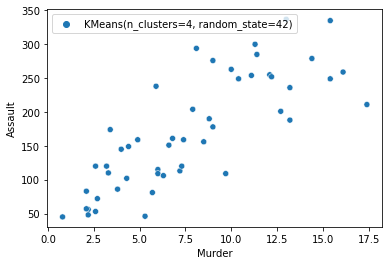

In [47]:
sns.scatterplot(x=kmeans_crime_rates['Murder'], y = kmeans_crime_rates['Assault'],hue=k_means)

This shows a distribution of how the states are scattered and clusters are visible based on Murders and Assaults. And there is a positive correlation between occurrence of Murder and Assault in different states.

<AxesSubplot:xlabel='Rape', ylabel='Assault'>

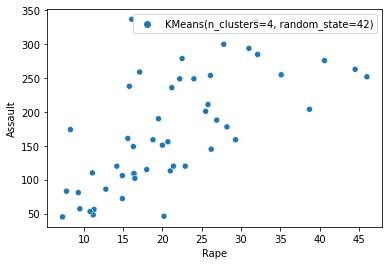

In [49]:
sns.scatterplot(x=kmeans_crime_rates['Rape'], y = kmeans_crime_rates['Assault'],hue=k_means)
#We can use scatter plot to see the correlation between two atrributes

In [50]:
kmeans_crime_rates[kmeans_crime_rates['kmeans_cluster']==1]
#This would show exactly which states are values are in my cluster 1

,State,Murder,Assault,UrbanPop,Rape,kmeans_cluster
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
20,Massachusetts,4.4,149,85,16.3,1
29,New Jersey,7.4,159,89,18.8,1
34,Ohio,7.3,120,75,21.4,1
35,Oklahoma,6.6,151,68,20.0,1
36,Oregon,4.9,159,67,29.3,1


By mean we can see the count of murder,assault,population and rape in each clusters. Basically ,by using k-means and hirerachial clustering in the dataset we could divide states in segments and study the parameters and conclude which cluster is safe zone,danger zone or moderate zone.I have used 'ward' method in hirerachial clustering as it reduces the variance within cluster otherwise it will be cubersome and becomes difficult to know the number of clusters. i have visualized the clusters using Scatter plot to know how they parameters are correlated and i have count count 